In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Example to understand Bayes Theorem

Inspired from *Machine Learning, a probabilistic perspective (Murphy, 2012)*

Let's establish 4 hypotheses.

1: Even numbers

2: Powers of 2

3: Powers of 4

4: Multiples of 4 or the number 5

## Likelihood

In [2]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [3]:
h1 = [a for a in range(2, 100) if a % 2 == 0] #Even numbers
h2 = [a for a in range(2, 100) if a & (a - 1) == 0 ] #Powers of 2
h3 = [a for a in range(2, 100) if (a & (a - 1)) == 0 and (a - 1) % 3 == 0 ] #Powers of 4
h4 = [a for a in range(2, 100) if (a % 4 == 0) or a == 5] #Multiples of 4 or the number 5

print("Sample spaces")
print("Hypothesis 1: ", len(h1), h1)
print("Hypothesis 2: ", len(h2), h2)
print("Hypothesis 3: ", len(h3), h3)
print("Hypothesis 4: ", len(h4), h4)
hypothesis = [h1, h2, h3, h4]

Sample spaces
Hypothesis 1:  49 [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
Hypothesis 2:  6 [2, 4, 8, 16, 32, 64]
Hypothesis 3:  3 [4, 16, 64]
Hypothesis 4:  25 [4, 5, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96]


In [4]:
def get_posterior(bayes_df, data):
    #Let's check if the data is coherent with the hypothesis, and then, we assign the likelihood as (1/|h|)^N
    bayes_df["Likelihood"] = [(1 / len(h)) ** len(data) if len(set(data) - set(h)) == 0 else 1e-10 for h in hypothesis]
    bayes_df["Posterior"] = bayes_df["Likelihood"] * bayes_df["Prior"] #Likelihood times prior
    bayes_df["Posterior"] = bayes_df["Posterior"] / bayes_df["Posterior"].sum() #Normalize
    return bayes_df

def update(bayes_df):
    bayes_df["Prior"] = bayes_df["Posterior"] #Update priors with last posterior
    bayes_df["Likelihood"] = np.nan #Null
    bayes_df["Posterior"] = np.nan #Null
    return bayes_df

def create_plot(df):
    sns.barplot(df, y = "Prior", x = df.index) #Barplot
    plt.xlabel("Hypothesis")
    plt.ylabel("")
    plt.ylim(0,1)

def init_bayes(priors = [0.25 for _ in range(4)]): #Default prior equals to uniform distribution
    bayes_df = pd.DataFrame(index=["h1", "h2", "h3", "h4"],
                            columns=["Likelihood", "Prior", "Posterior"]) #Init prior probabilities
    bayes_df["Prior"] = priors
    return bayes_df

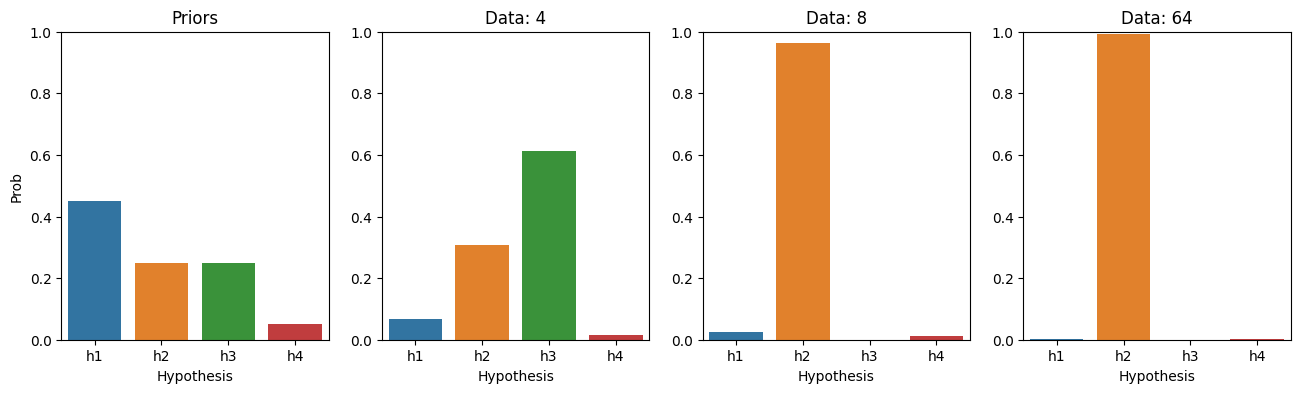

In [5]:
data = [4, 8, 64] #Our data
priors = [0.45, 0.25, 0.25, 0.05] #Let's assign a prior probability in base of the "simplicity" of the hypothesis. 

bayes_df = init_bayes(priors)
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
create_plot(bayes_df)
plt.title("Priors")
plt.ylabel("Prob")

for i, item in enumerate(data):
    bayes_df = get_posterior(bayes_df, [item])
    bayes_df = update(bayes_df)
    plt.subplot(1,5,i+2)
    create_plot(bayes_df)
    plt.title(f"Data: {item}")
plt.show()

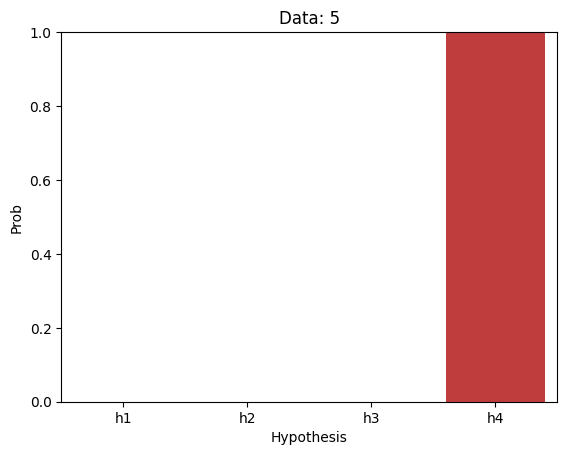

In [6]:
get_posterior(bayes_df, [5])
bayes_df = update(bayes_df)
create_plot(bayes_df)
plt.title(f"Data: 5")
plt.ylabel("Prob")
plt.show()